# Smoke Sensor Data Exploratory Data Analysis

## Import Necessary Libraries

In [1]:
## Import necessary libraries
from urllib.parse import quote

## Import necessary API
import sys
sys.path.append('../../../../')
from api.v2.util.data_load import data_load
from api.v2.util.get_tag_name import show_column
from api.v2.eda.Data_Info import Data_Info
from api.v2.eda.Statistical_test import adf_test, kpss_test, pp_test, ljung_box_test, arch_test, vif_test
from api.v2.eda.Visualize_EDA import Visualize_EDA

## Set Smoke Sensor Data Base Parameter

In [2]:
# Set Smoke Sensor Data Base Parameter

# Set MachBase Neo URL address
URL = 'http://127.0.0.1:5654'
# Set Tag Table Name
table = 'smoke'
# Set TimeFormat - > 'default' or '2006-01-02 15:04:05.000000'(Divided down to the nanosecond)
timeformat = 'Default'
# Set resample Option -> D(day), H(hour), T(minute), S(second)
resample_freq = None

## Check Smoke Sensor Data Info

In [3]:
# Print Smoke Sensor DataInfo
Data_Info(URL, table, timeformat, resample_freq)

Tag List: ['CNT', 'Fire Alarm', 'Humidity[%]', 'NC0.5', 'NC1.0', 'NC2.5', 'PM1.0', 'PM2.5', 'Pressure[hPa]', 'Raw Ethanol', 'Raw H2', 'TVOC[ppb]', 'Temperature[C]', 'eCO2[ppm]']
--------------------------------------------
Number of data: 62630
--------------------------------------------
Start Time: 2025-01-16 00:00:00
End Time: 2025-01-16 17:23:49
--------------------------------------------
Missing Values: 0
--------------------------------------------
Smallest time interval: 1.00 seconds
Largest time interval: 1.00 seconds
--------------------------------------------
Maximum sampling rate (per second): 1.0 Hz
--------------------------------------------


## Set Smoke Sensor Data Extra Parmeter
* Set based on the information confirmed in the previous step

In [4]:
# Set the desired tag names
tags = show_column(URL, table)
# Wrap each item in the list with single quotes and separate with commas
tags_ = ",".join(f"'{tag}'" for tag in tags)
# Set Tag Name
name = quote(tags_, safe=":/")
# Set Start time
start_time = '2025-01-16 00:00:00'
# Set End time 
end_time = '2025-01-16 17:23:49'
# Set TimeFormat - > 'default' or quote('2006-01-02 15:04:05.000000')(Divided down to the nanosecond)
timeformat = 'default'

In [5]:
# Smoke Sensor Data Load
df = data_load(URL, table, name, start_time, end_time, timeformat, resample_freq)

In [6]:
df

NAME,CNT,Fire Alarm,Humidity[%],NC0.5,NC1.0,NC2.5,PM1.0,PM2.5,Pressure[hPa],Raw Ethanol,Raw H2,TVOC[ppb],Temperature[C],eCO2[ppm]
TIME,,,,,,,,,,,,,,
2025-01-16 00:00:00,0.0,0.0,57.36,0.00,0.000,0.000,0.00,0.00,939.735,18520.0,12306.0,0.0,20.000,400.0
2025-01-16 00:00:01,1.0,0.0,56.67,0.00,0.000,0.000,0.00,0.00,939.744,18651.0,12345.0,0.0,20.015,400.0
2025-01-16 00:00:02,2.0,0.0,55.96,0.00,0.000,0.000,0.00,0.00,939.738,18764.0,12374.0,0.0,20.029,400.0
2025-01-16 00:00:03,3.0,0.0,55.28,0.00,0.000,0.000,0.00,0.00,939.736,18849.0,12390.0,0.0,20.044,400.0
2025-01-16 00:00:04,4.0,0.0,54.69,0.00,0.000,0.000,0.00,0.00,939.744,18921.0,12403.0,0.0,20.059,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-16 17:23:45,5739.0,0.0,15.79,4.32,0.673,0.015,0.63,0.65,936.670,20569.0,13723.0,625.0,18.438,400.0
2025-01-16 17:23:46,5740.0,0.0,15.87,4.18,0.652,0.015,0.61,0.63,936.678,20588.0,13731.0,612.0,18.653,400.0
2025-01-16 17:23:47,5741.0,0.0,15.84,3.95,0.617,0.014,0.57,0.60,936.687,20582.0,13725.0,627.0,18.867,400.0


## Check Visualize_EDA

Start Visualize All Method
Removed NaN Columns: set()


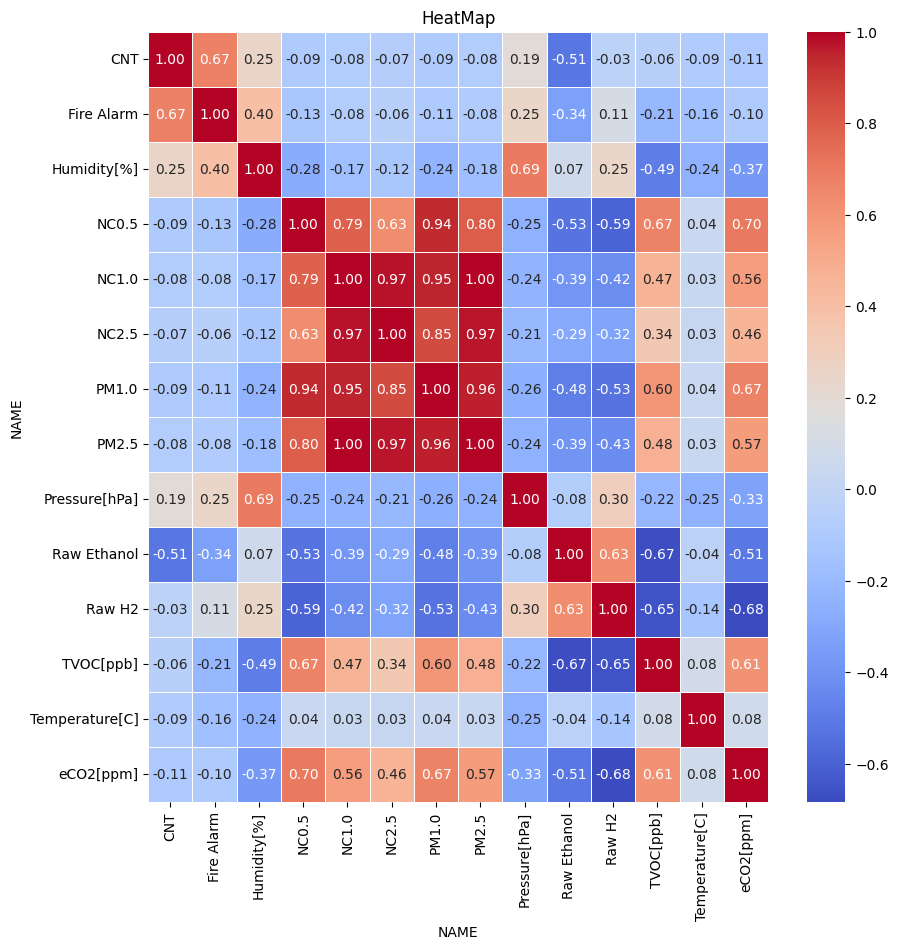

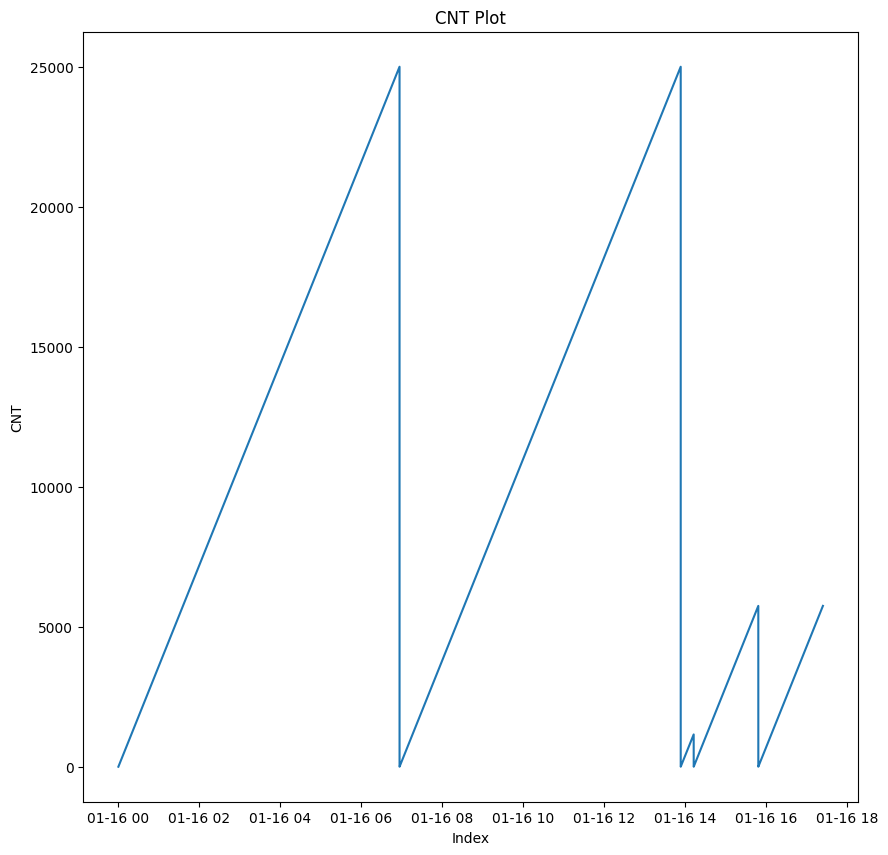

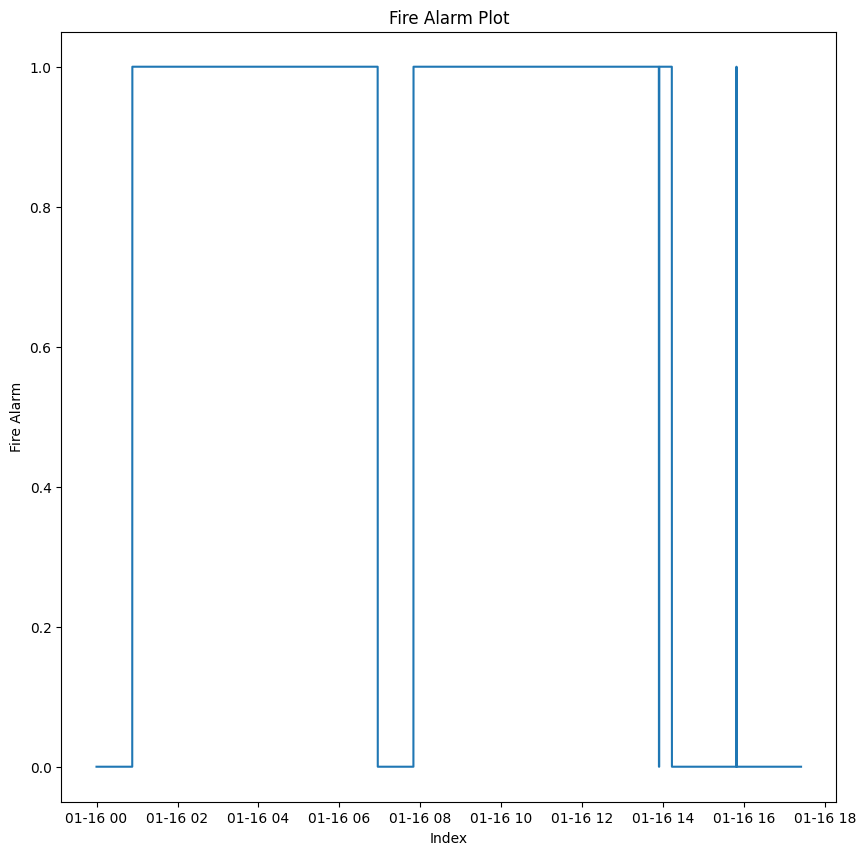

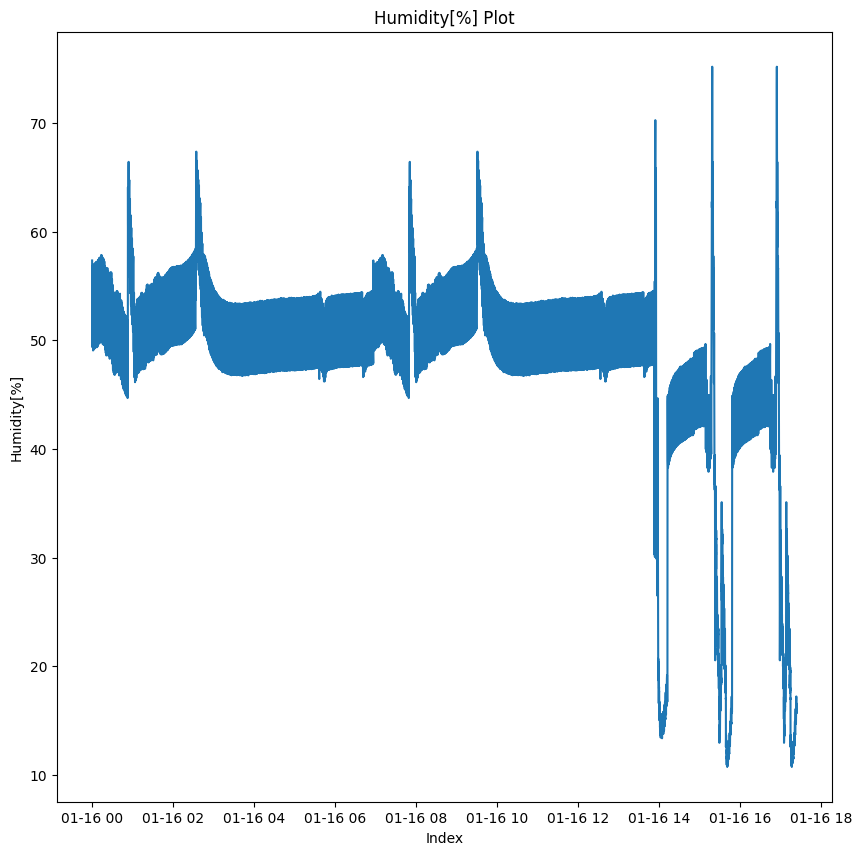

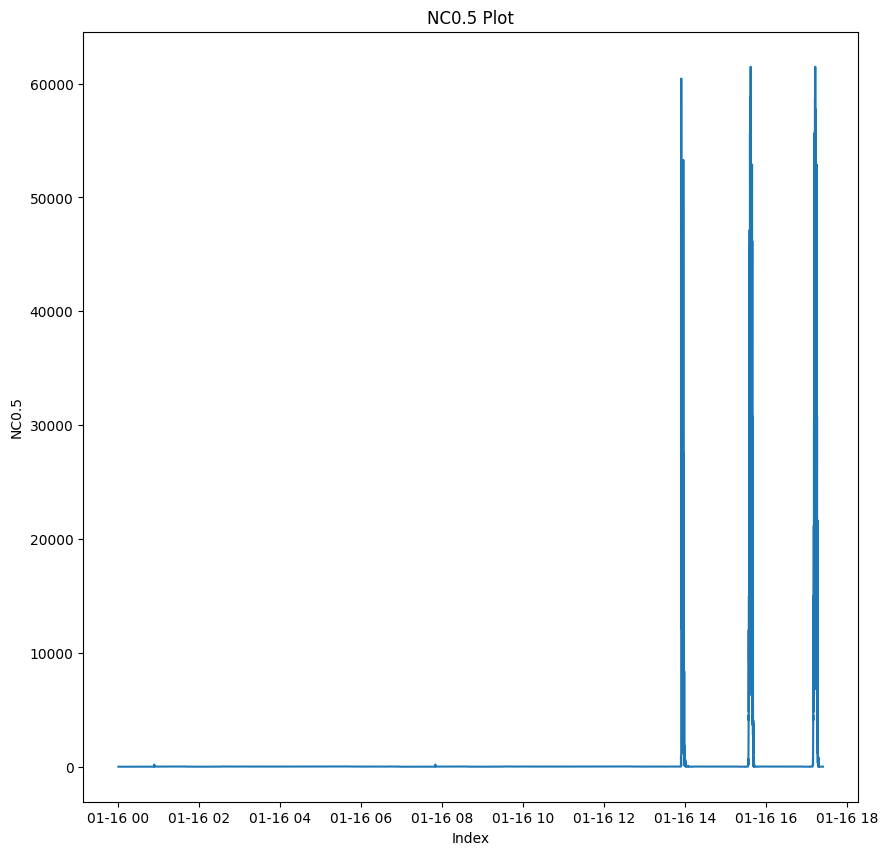

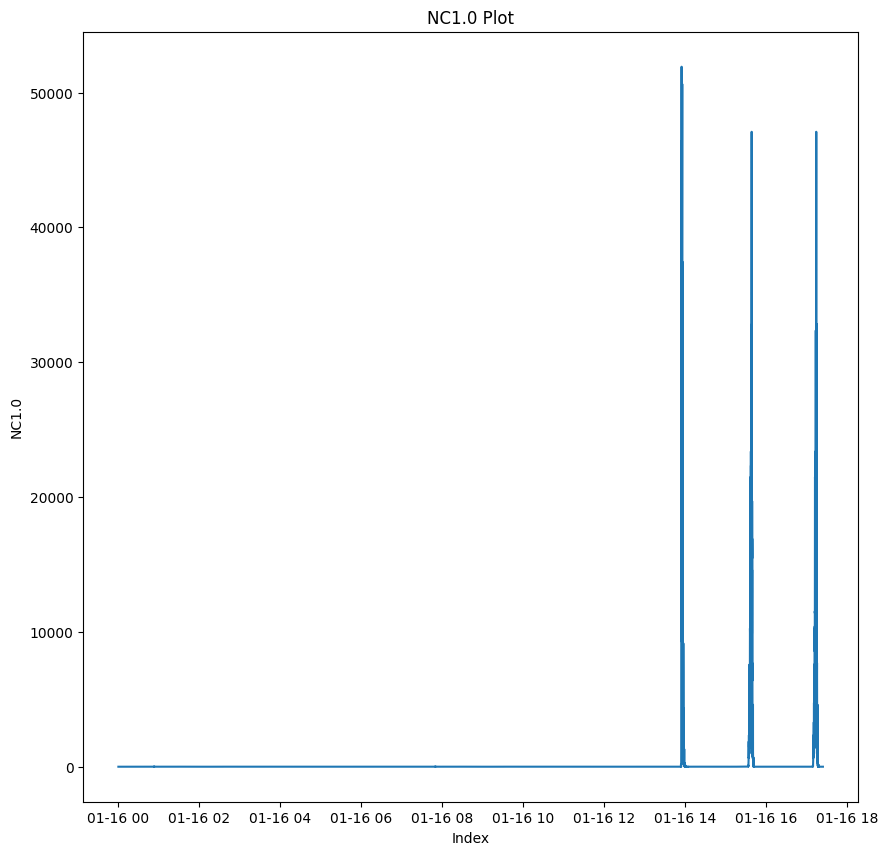

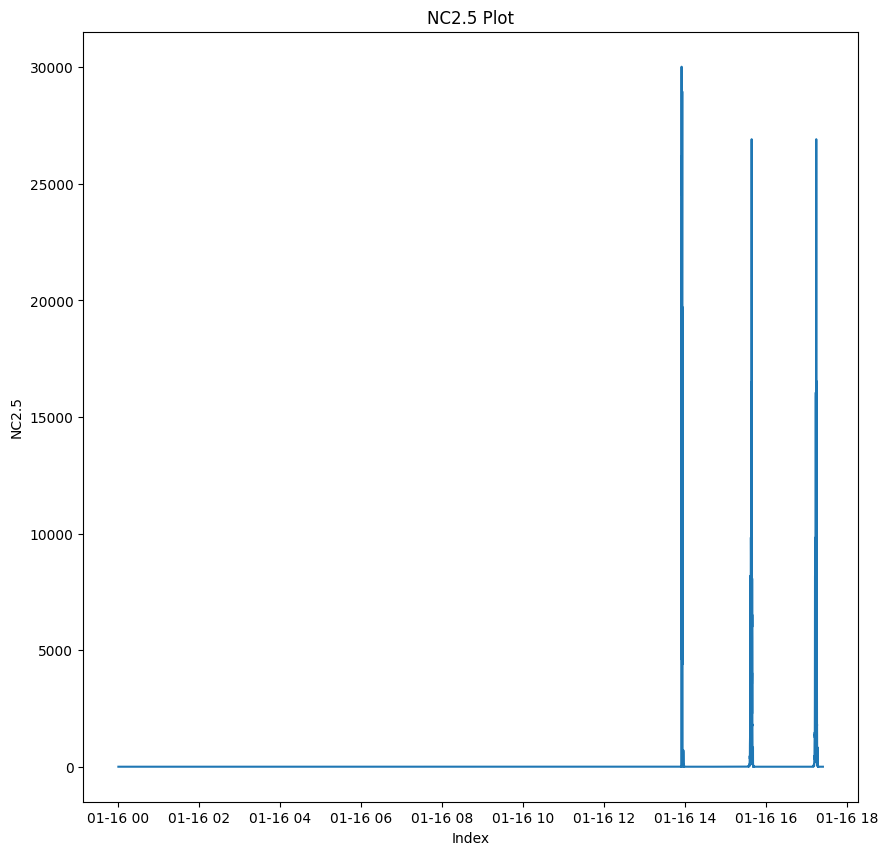

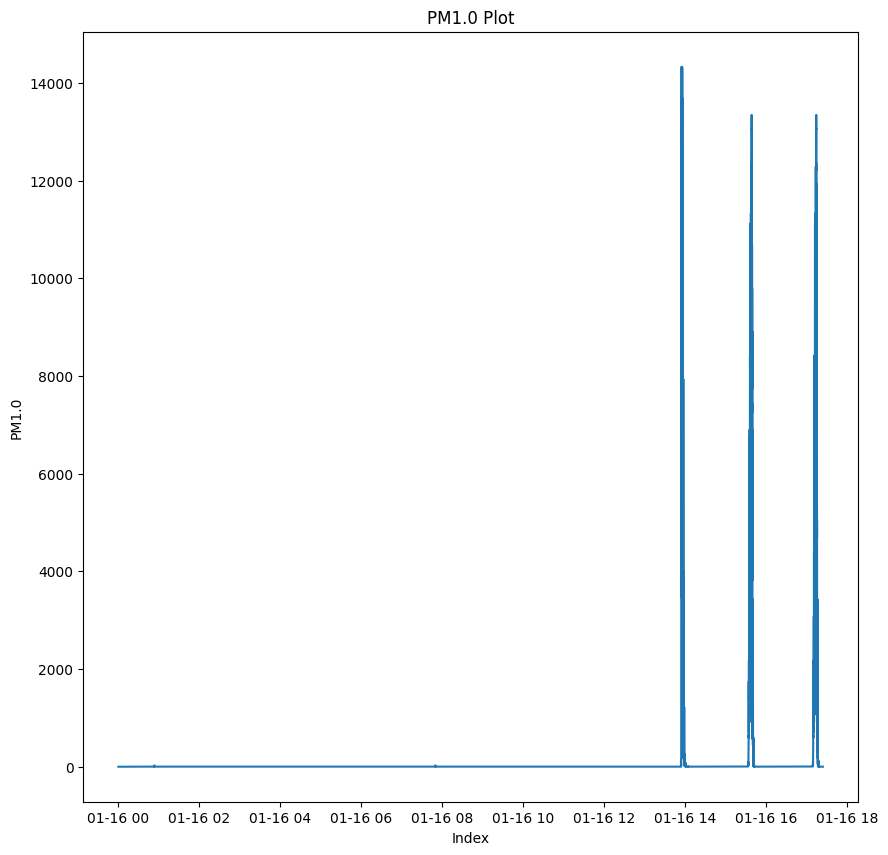

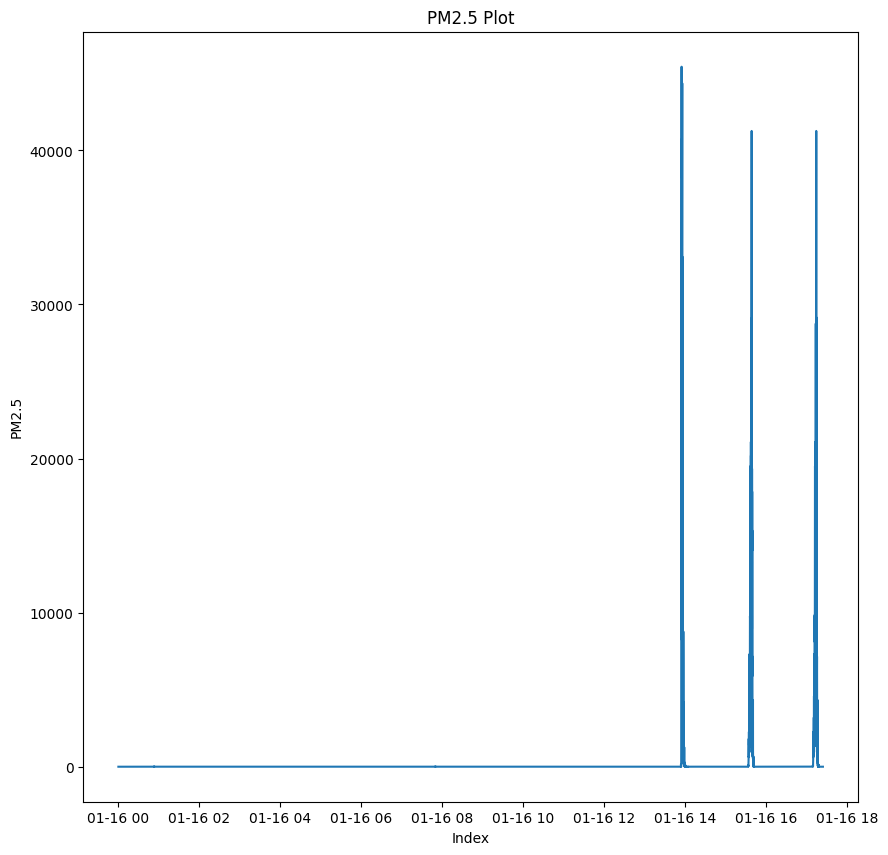

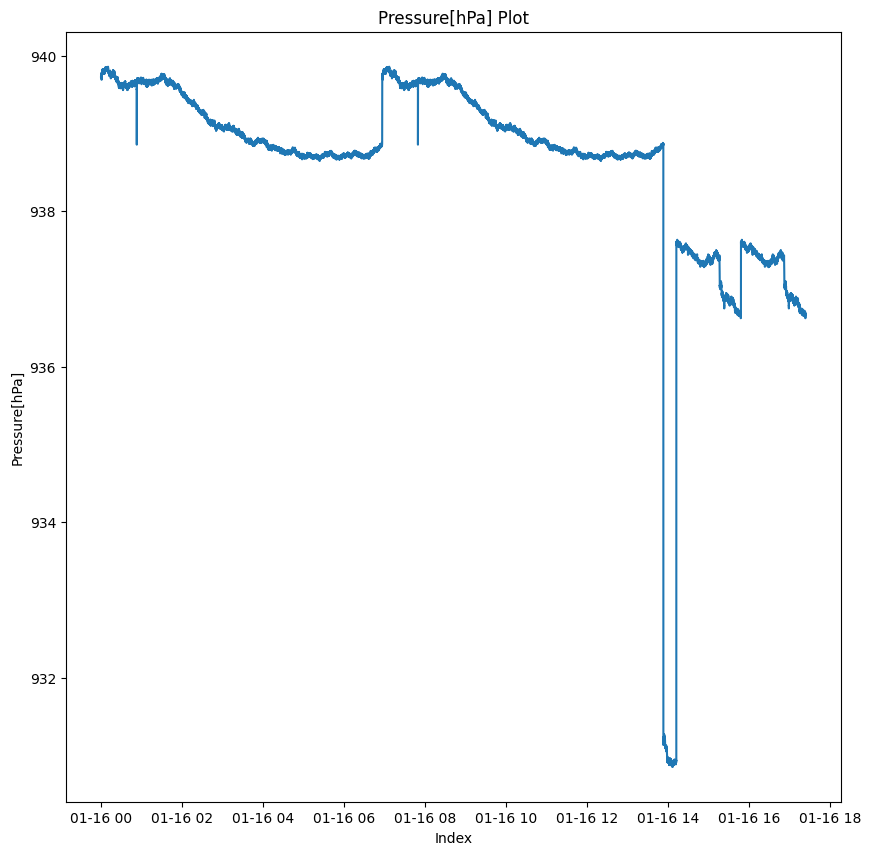

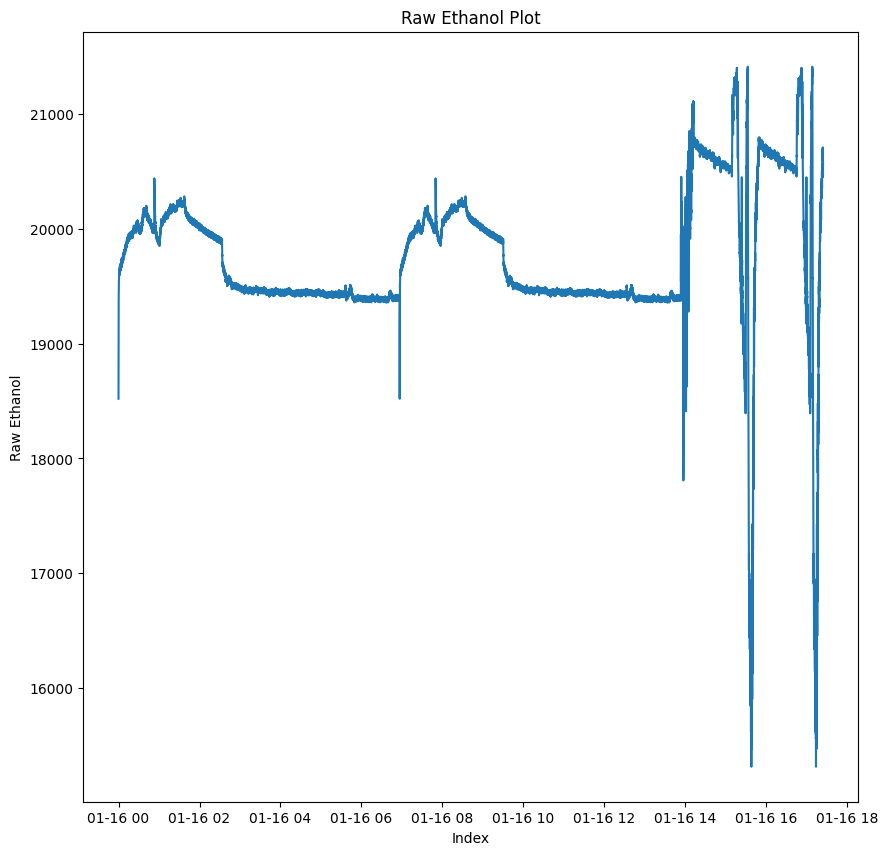

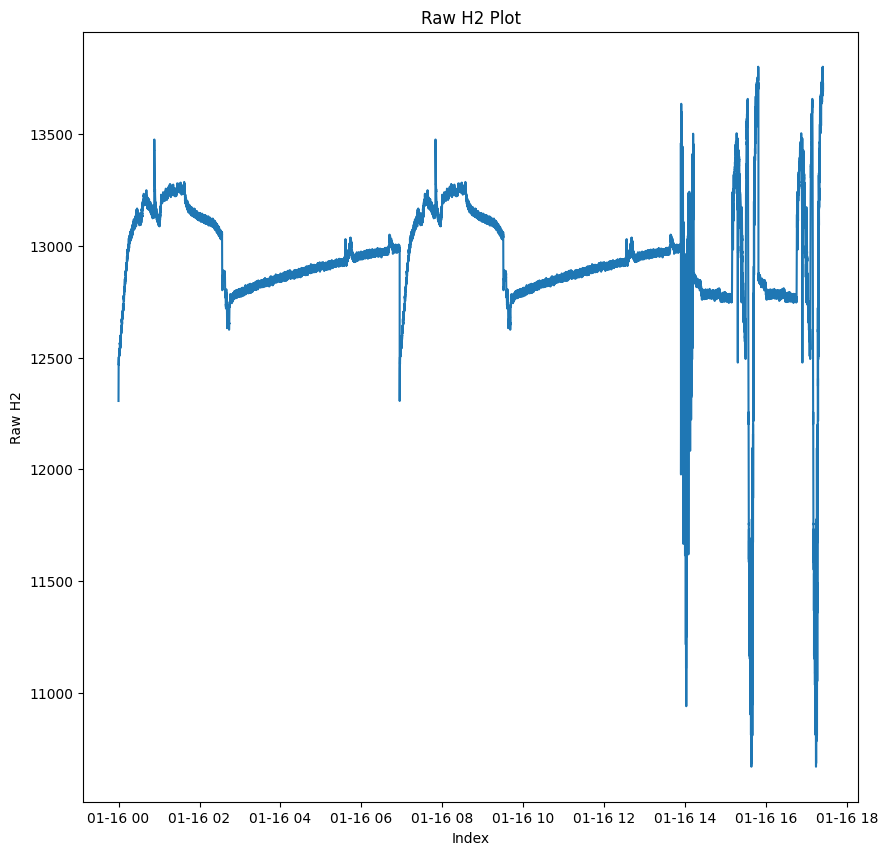

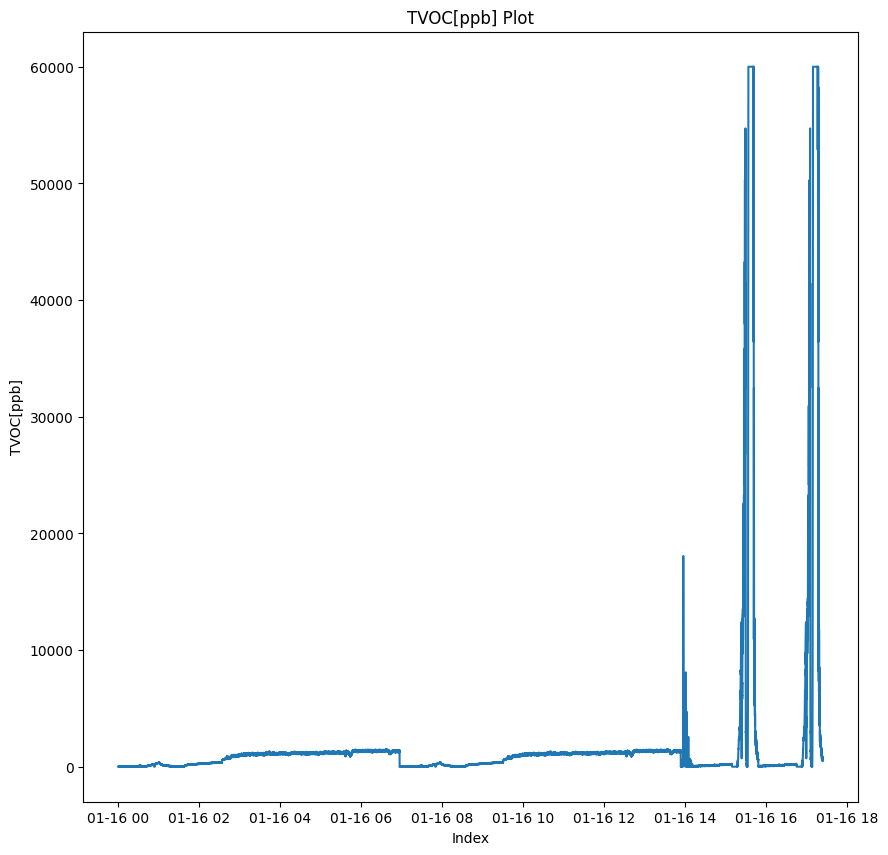

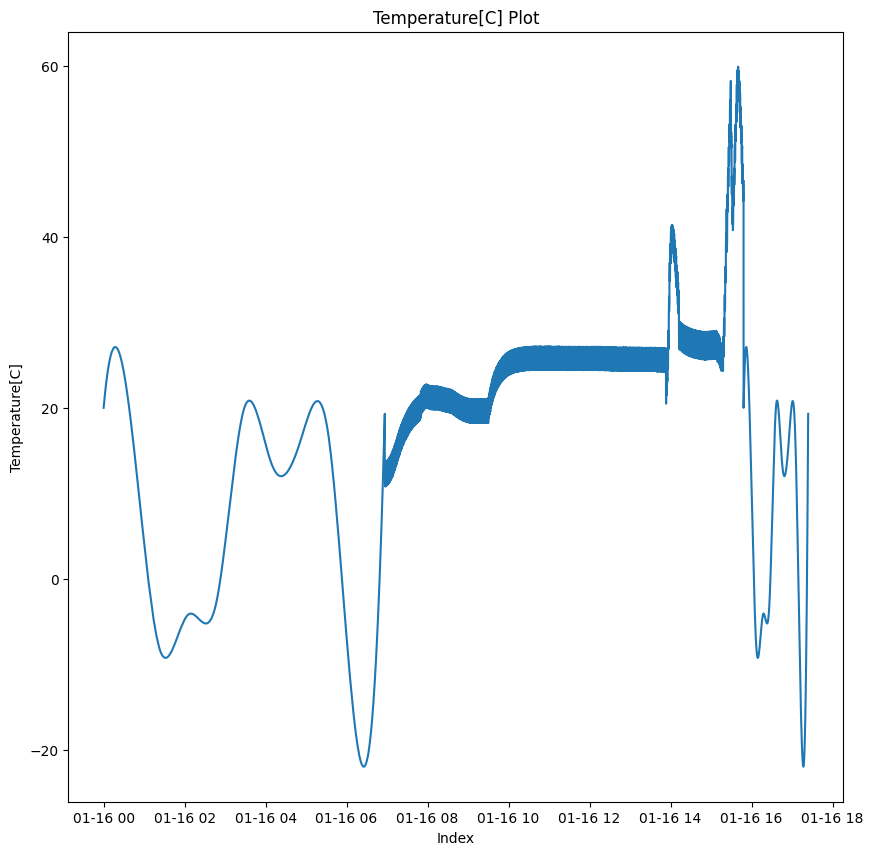

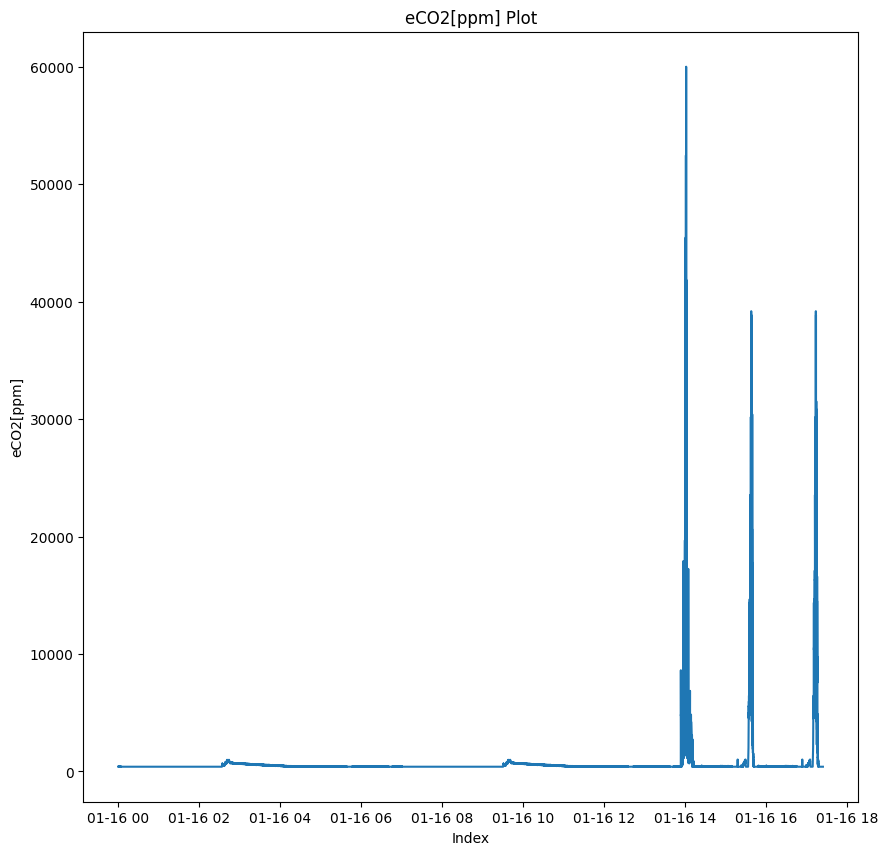

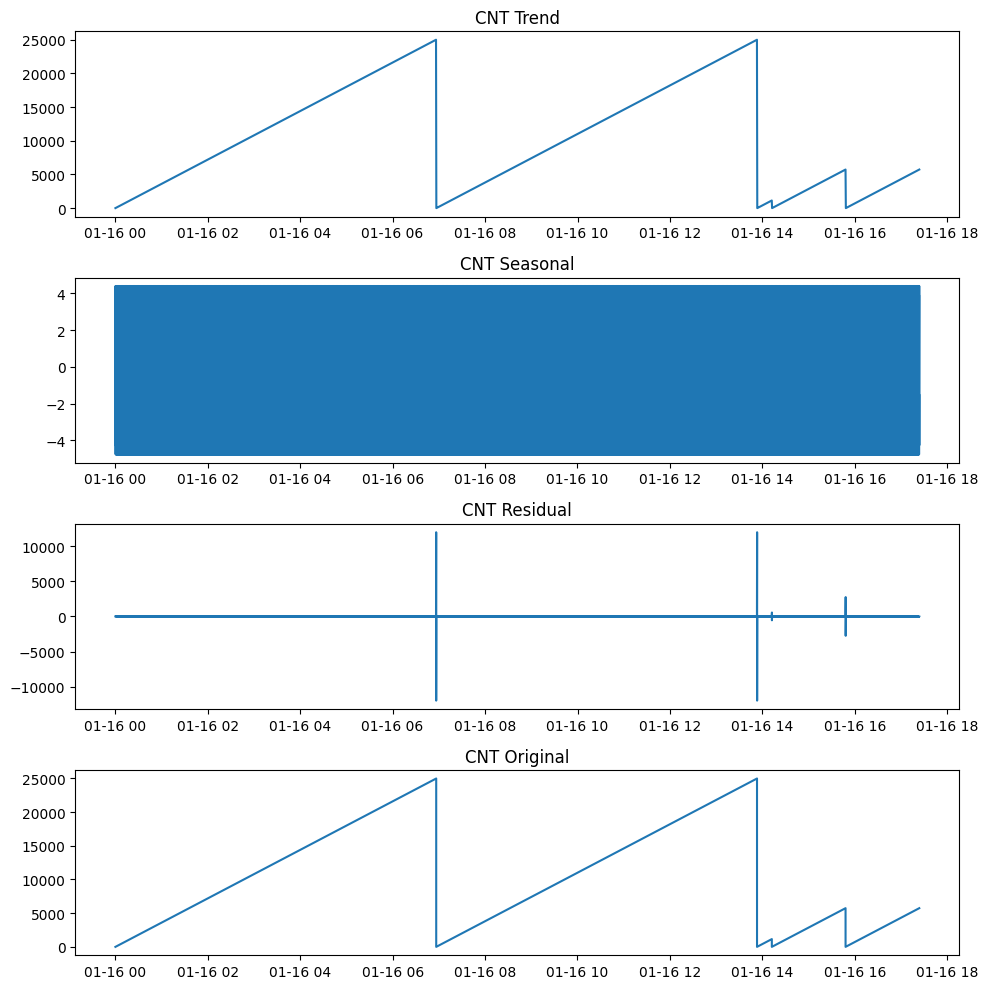

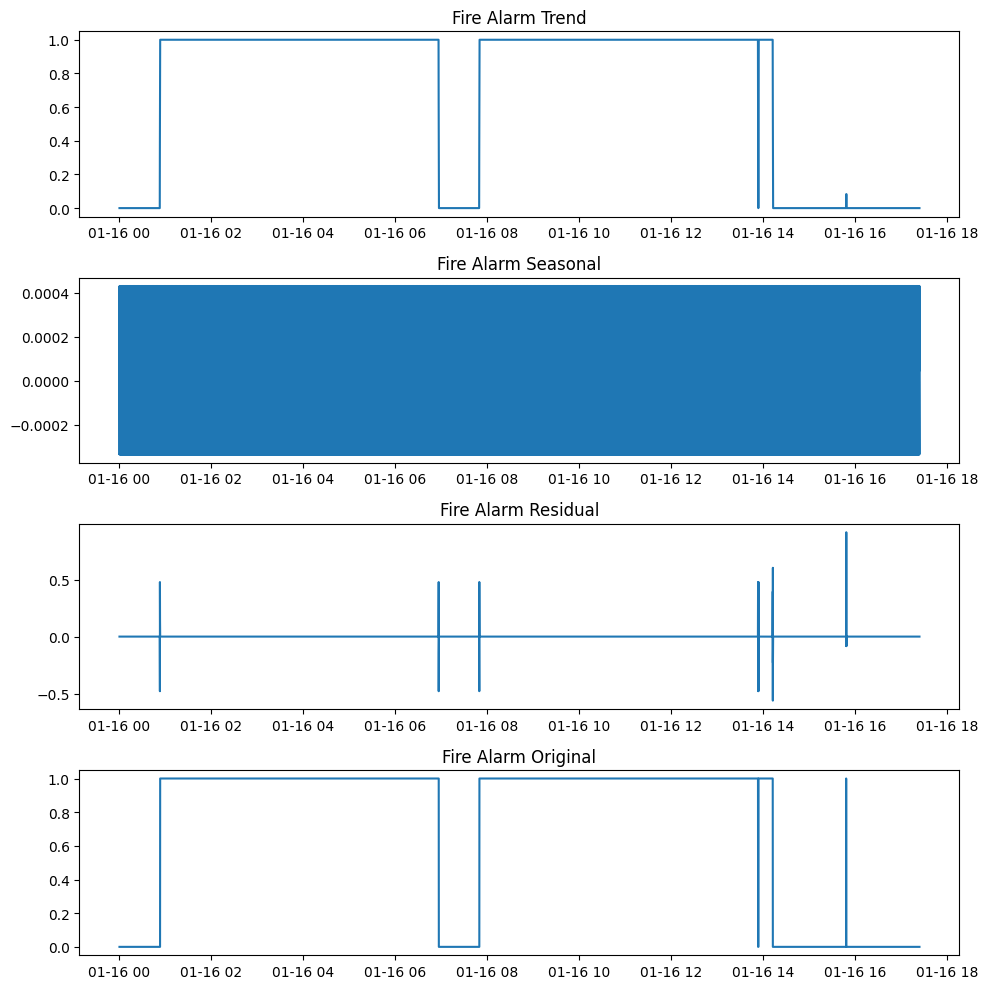

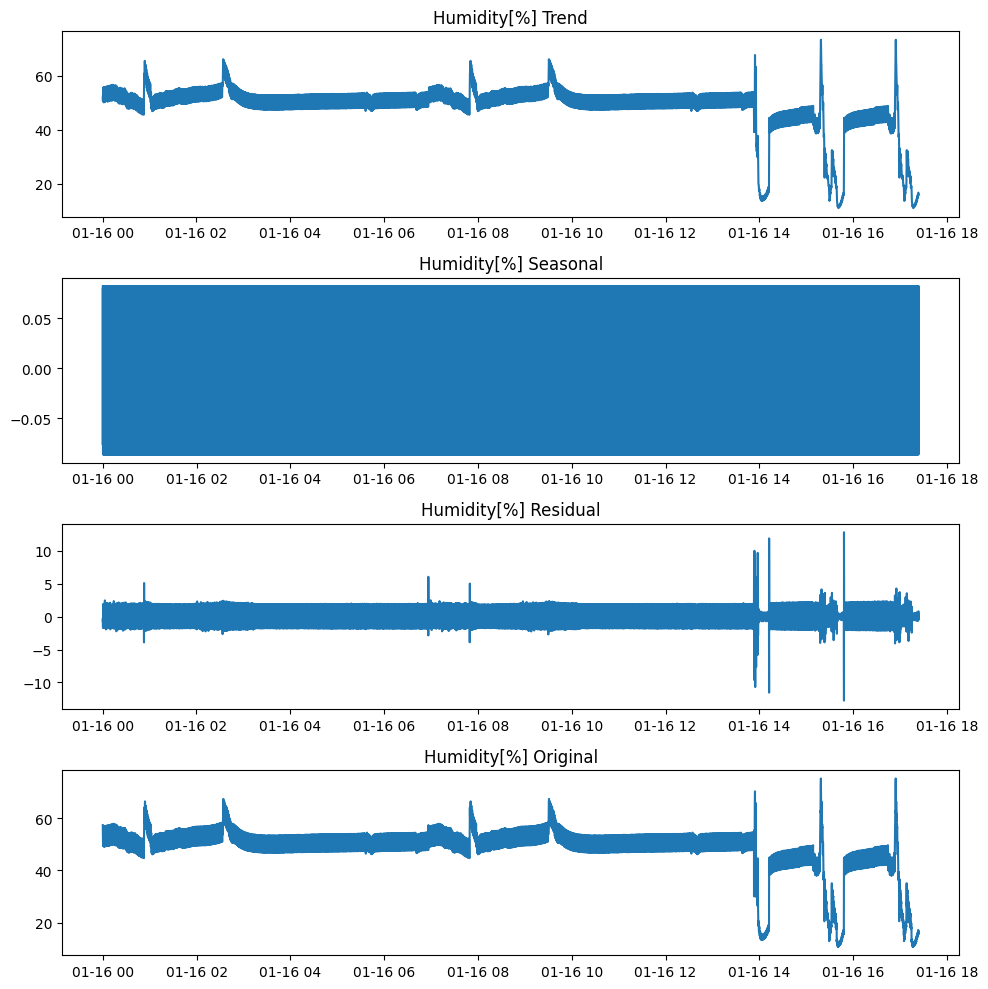

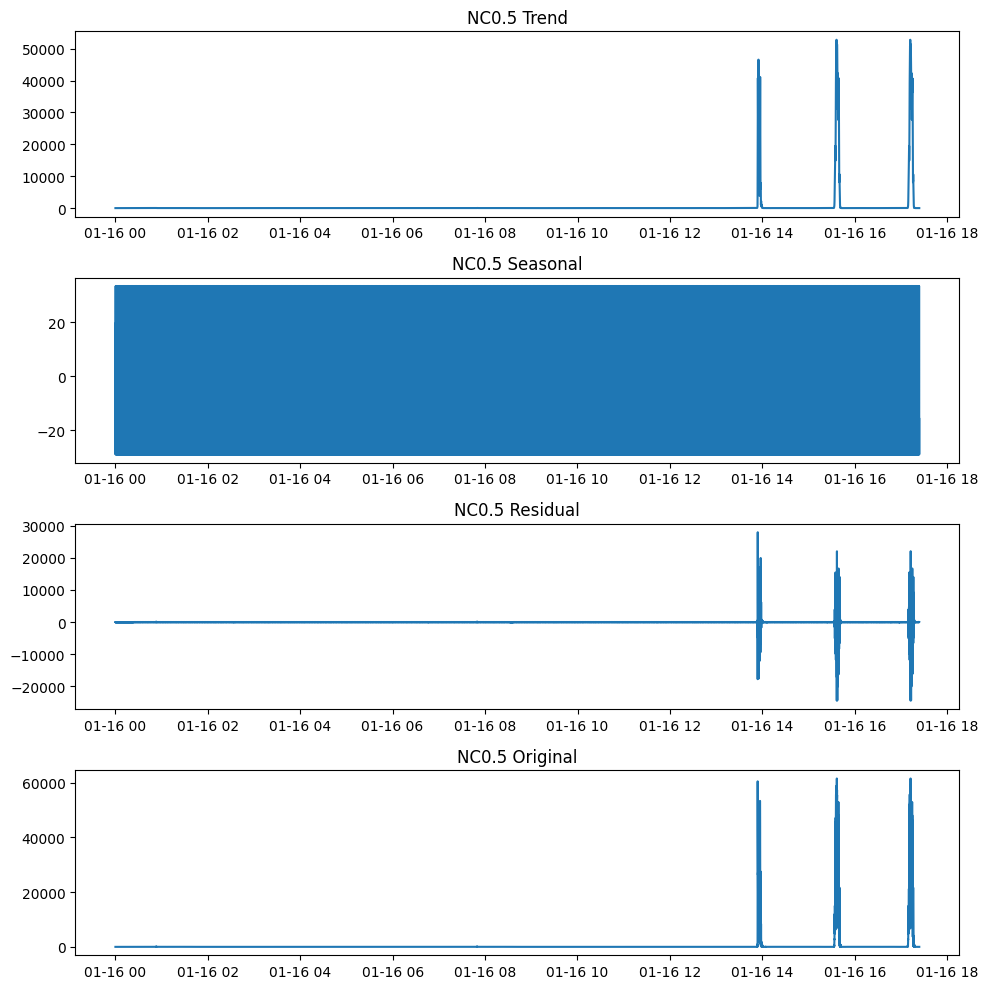

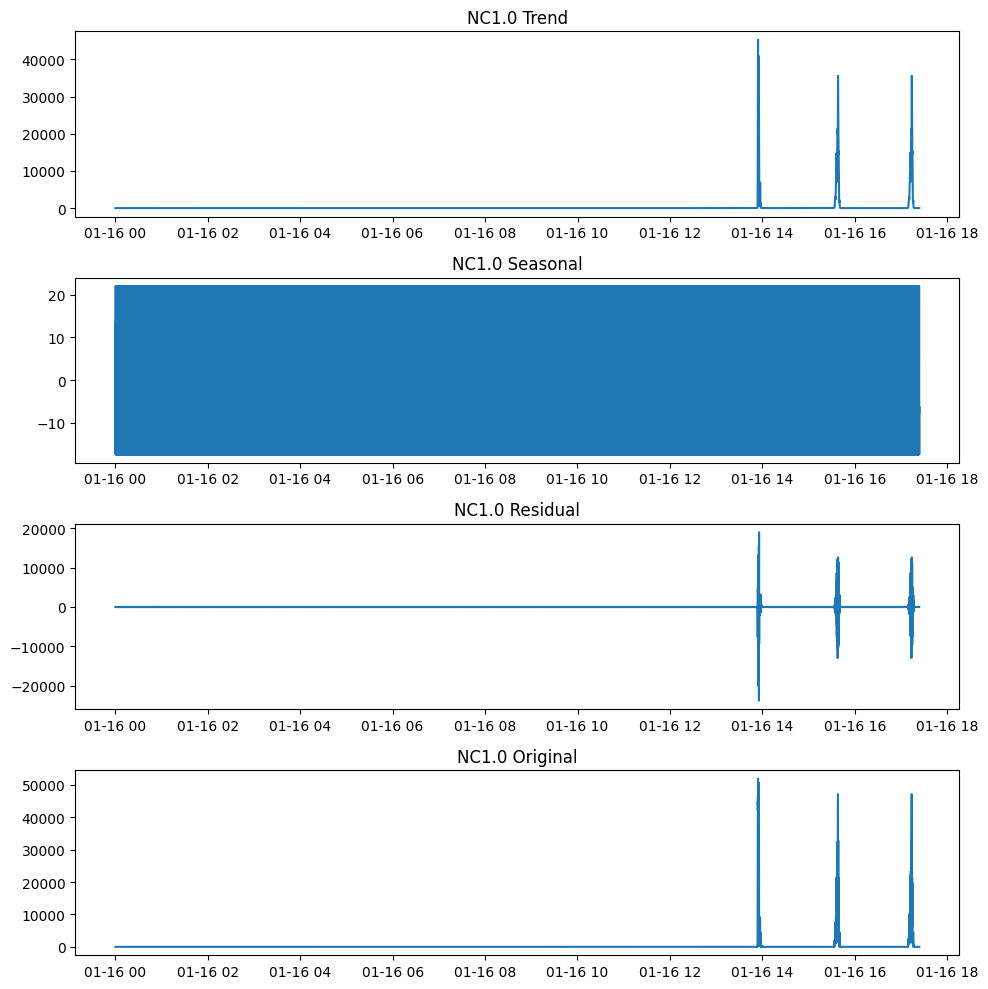

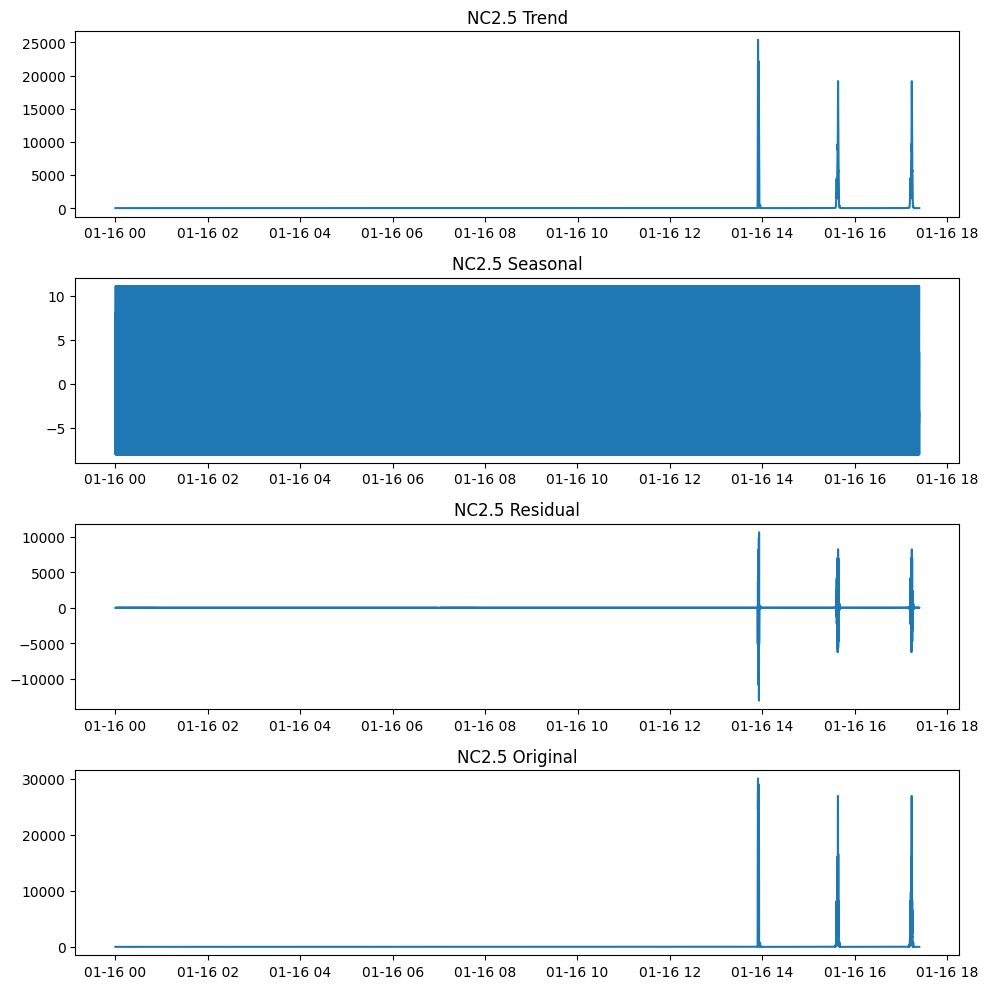

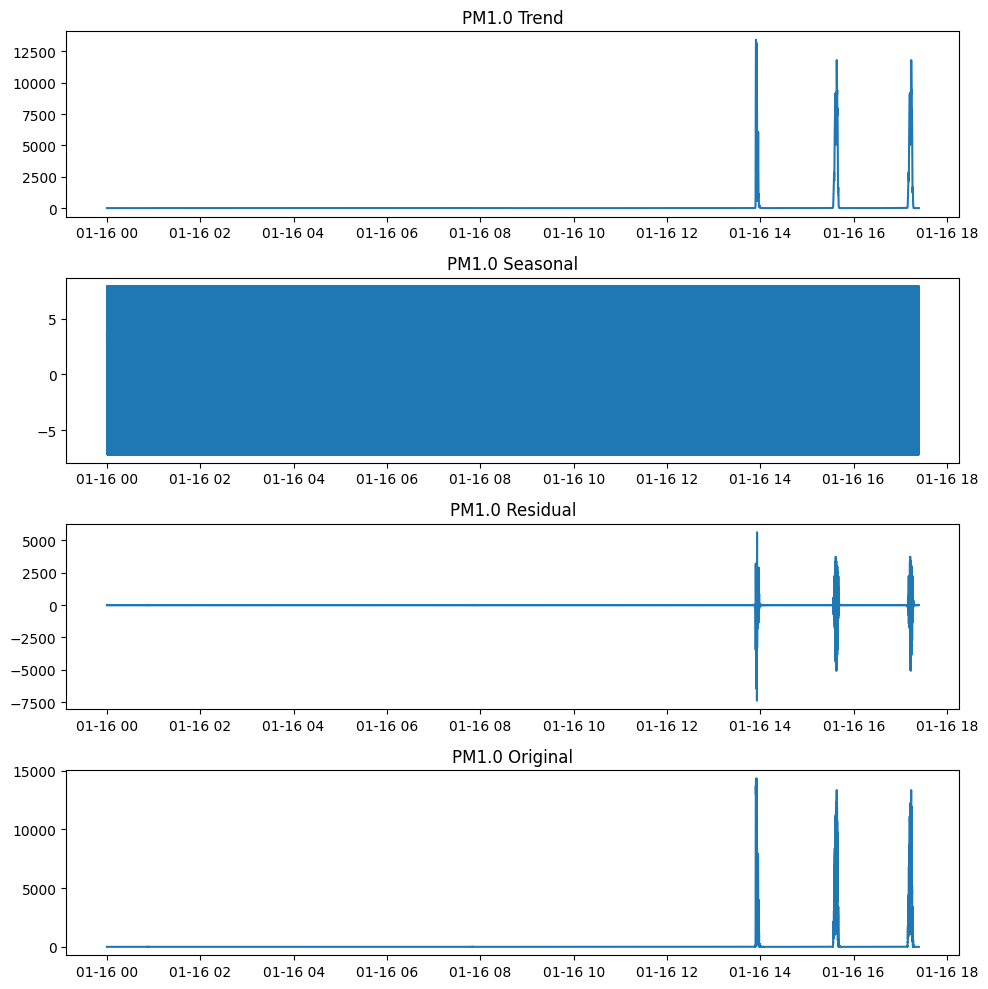

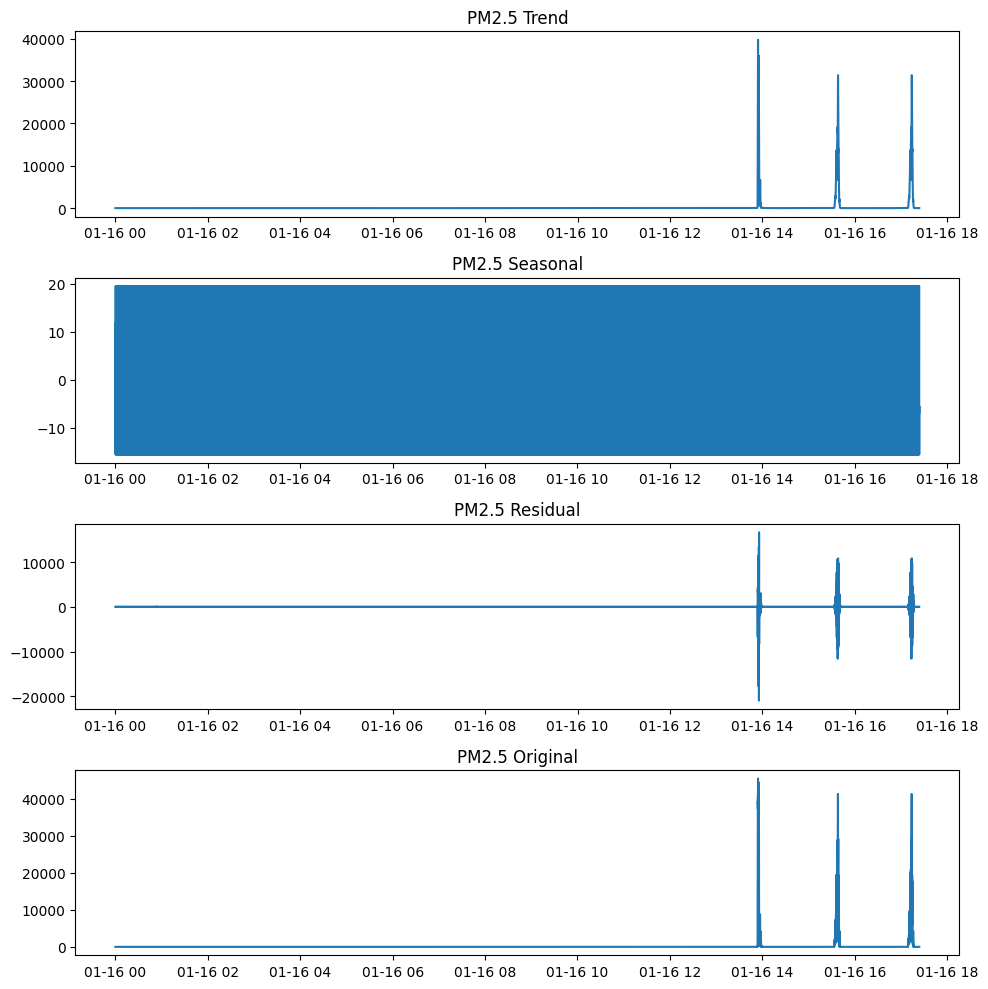

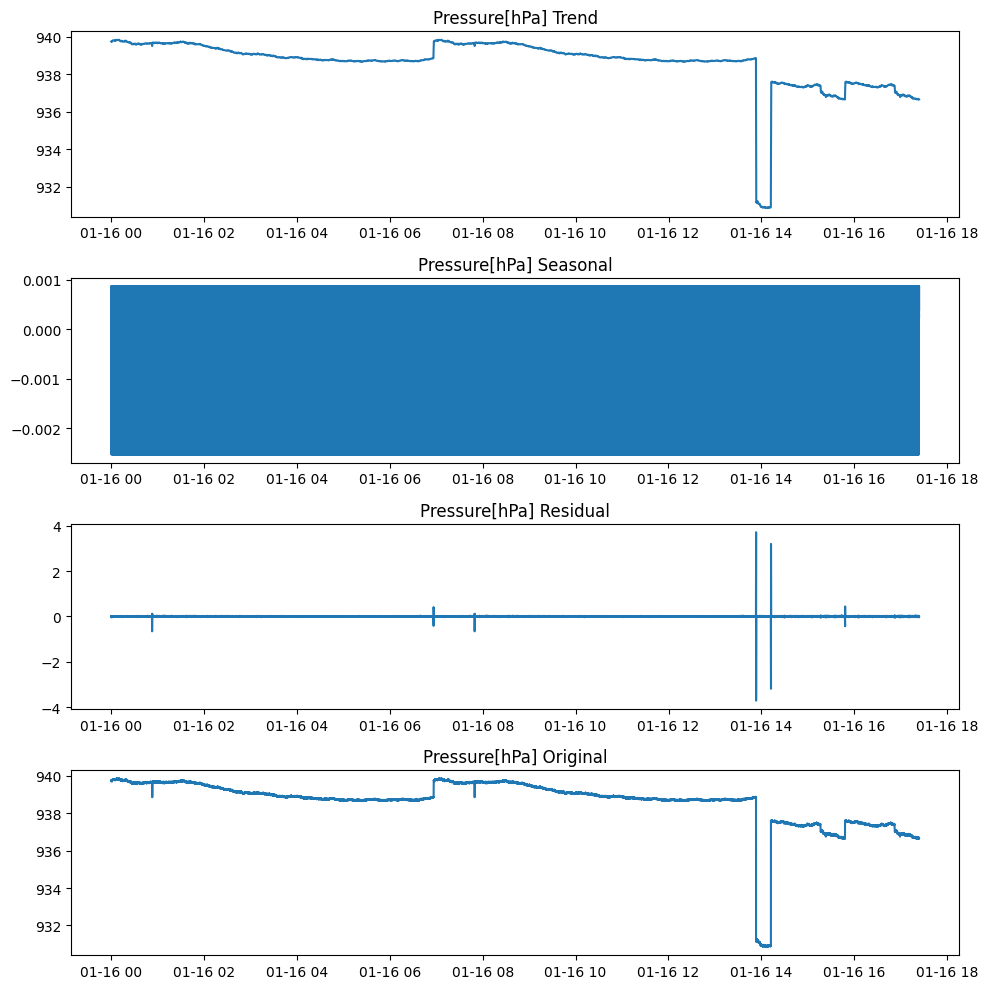

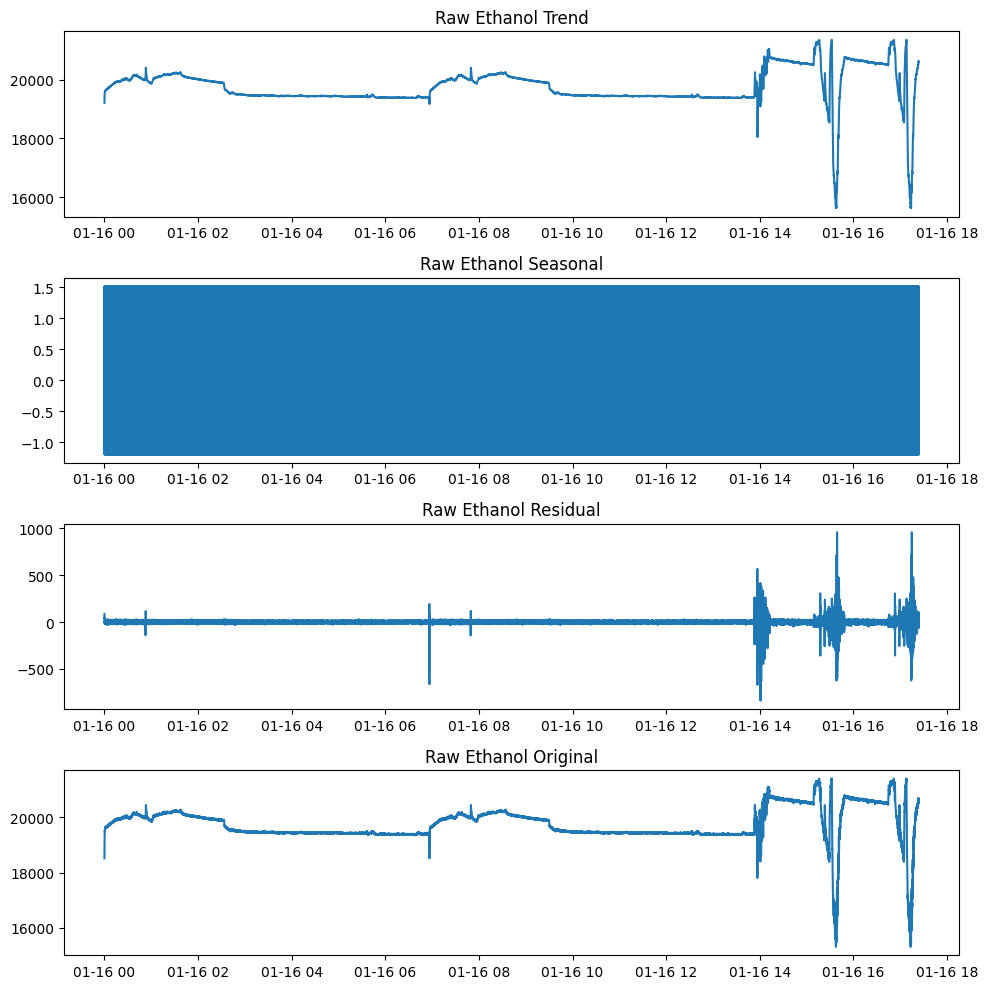

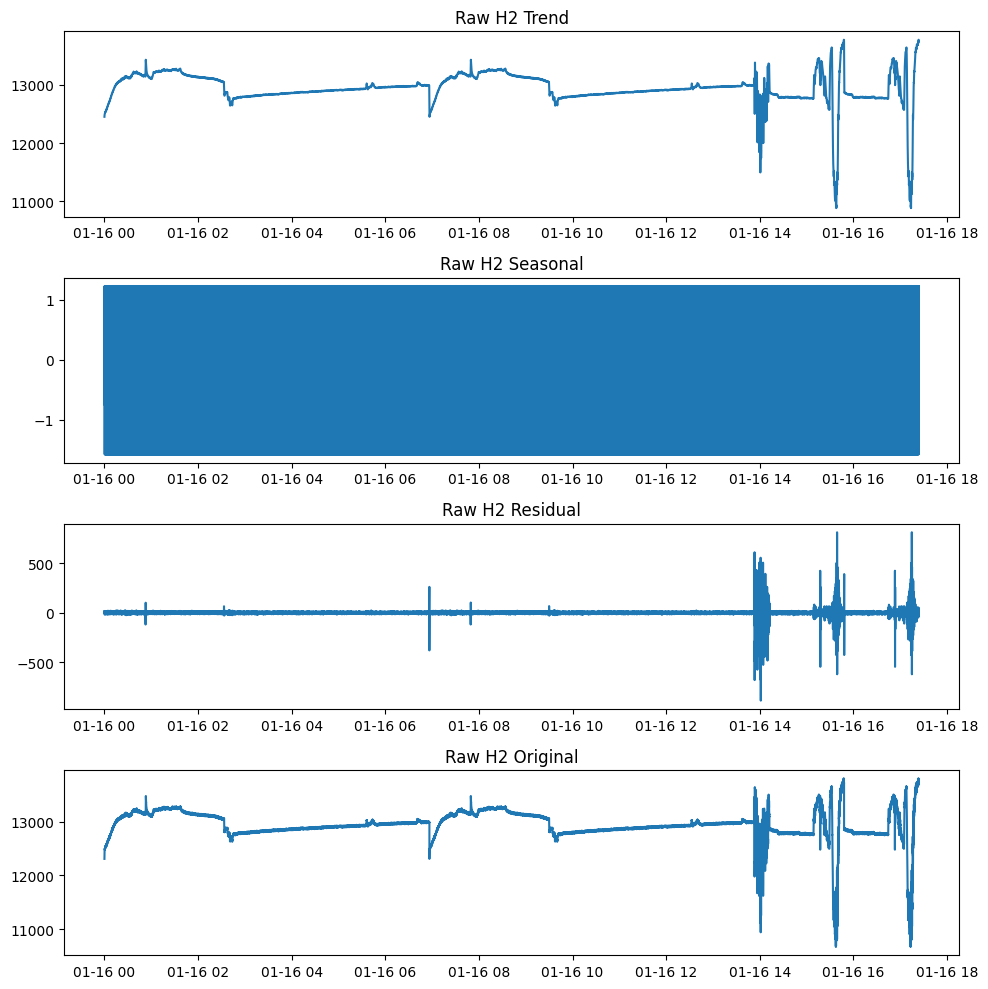

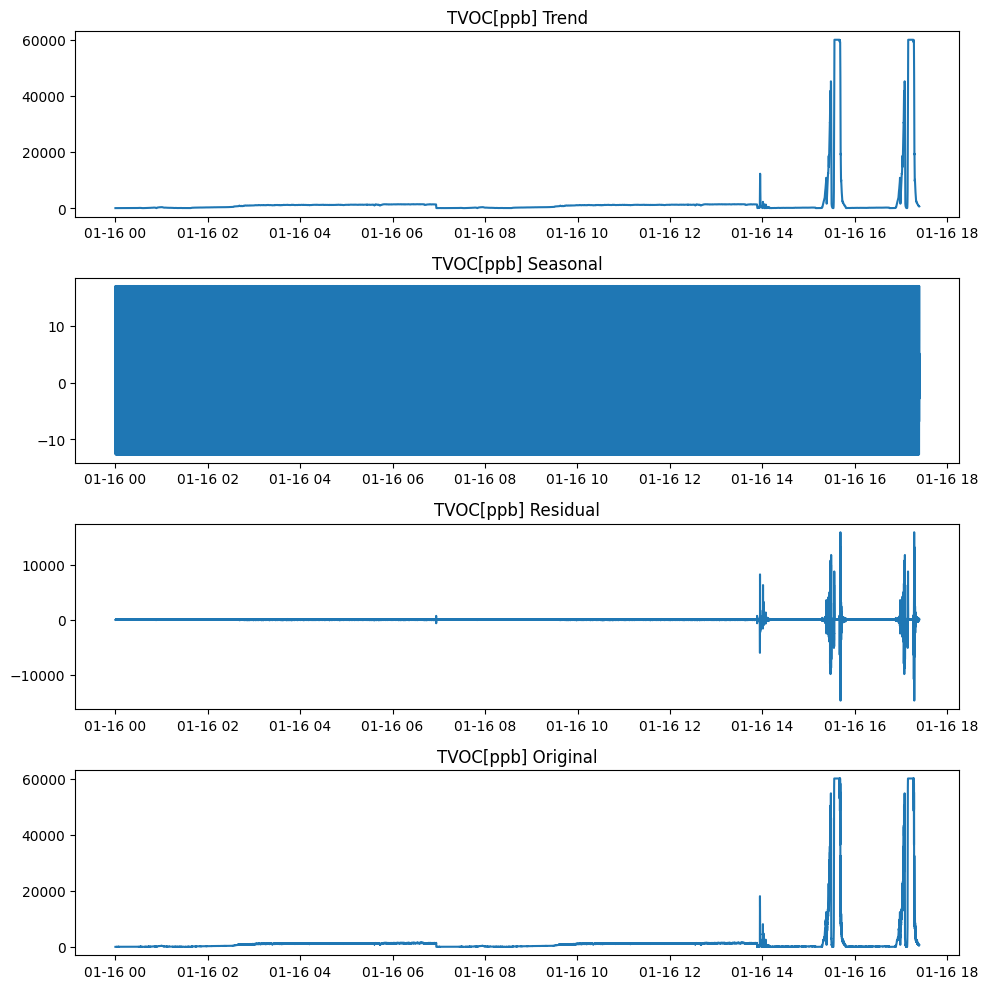

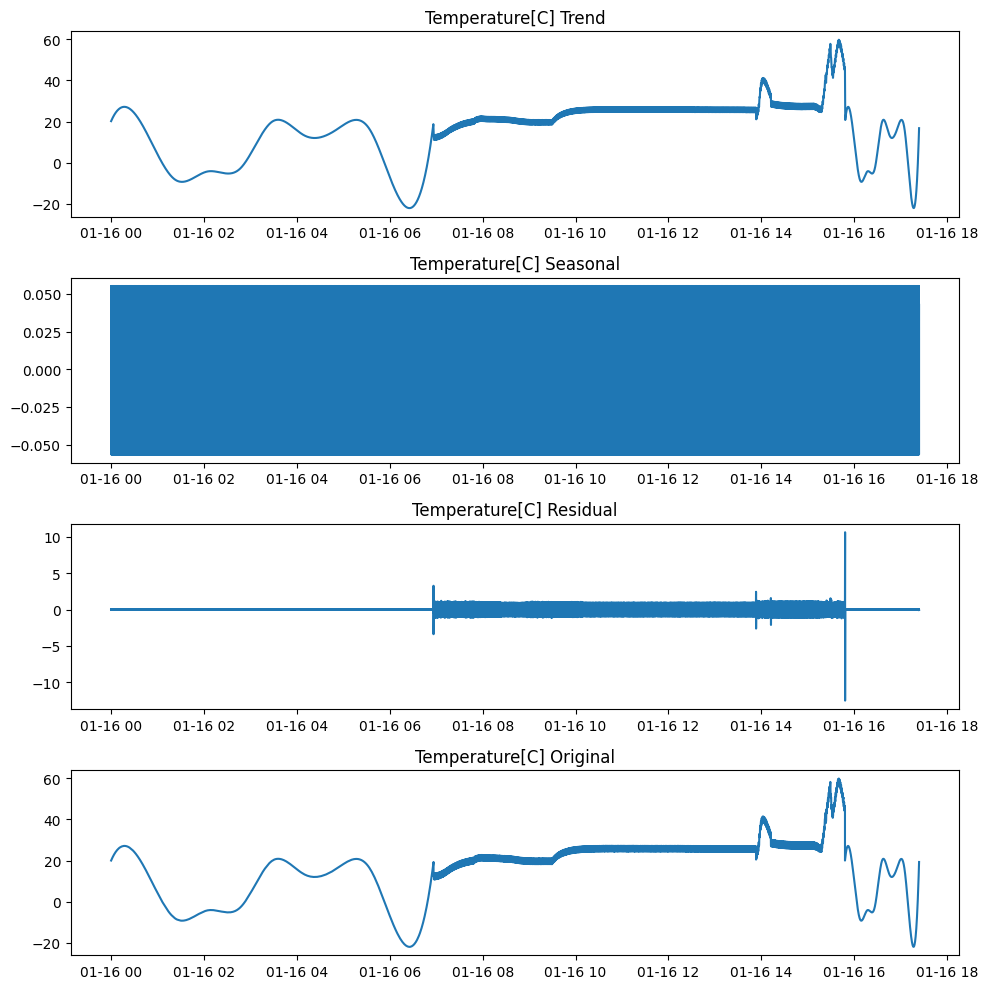

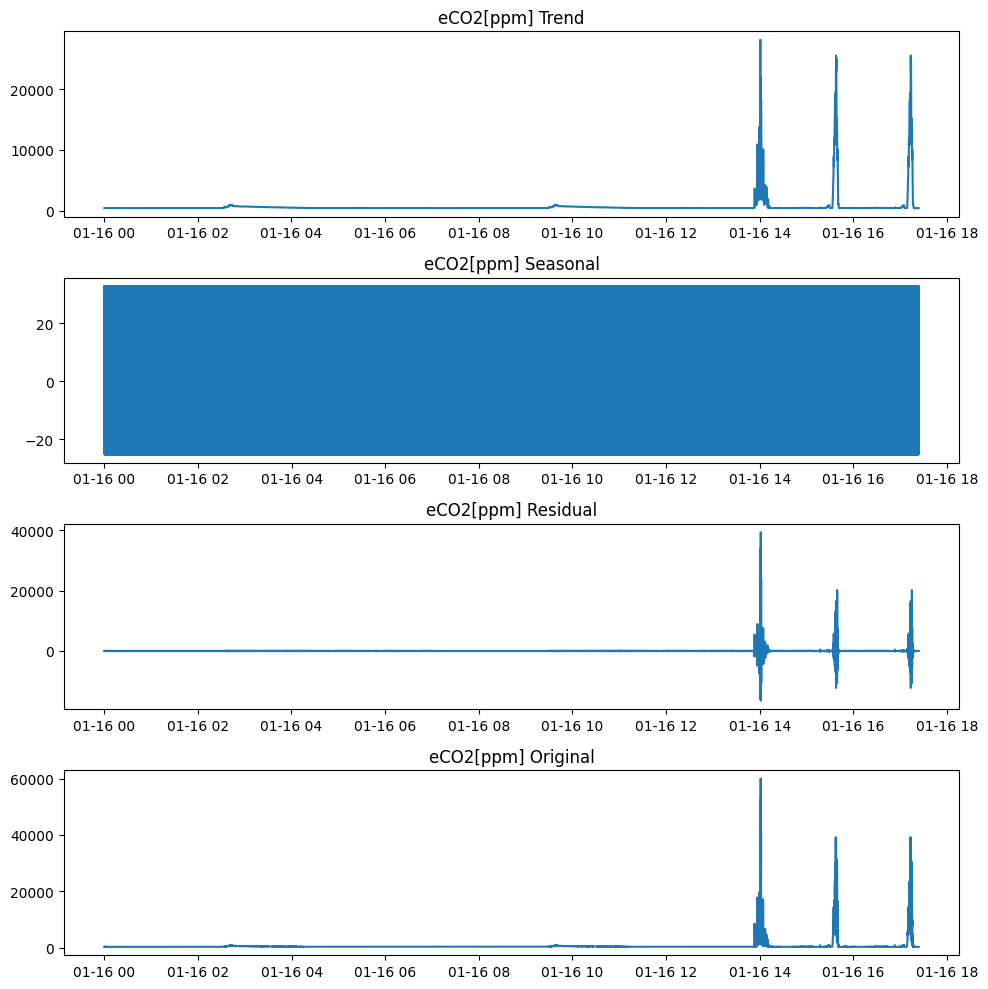

Save Finish


In [7]:
# Adjust period based on data for Decomposition
period = 24
# Plot width 
x_size = 10
# Plot height
y_size = 10
# Set option
# 1.HeatMap, 2.plot, 3.Decomposition, 4.All 
option = 4

# Set Start Function
Visualize_EDA(df, period, x_size, y_size, option)

## Check Statistical_Test

In [8]:
# Check ADF Test
adf_test(df)


adf_test for column: CNT
ADF Statistic: -2.519067678620451
p-value: 0.11090361221281575
Critical Values: {'1%': -3.4304544175708225, '5%': -2.861586150626941, '10%': -2.566794564416667}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: Fire Alarm
ADF Statistic: -2.2779698978326657
p-value: 0.17917157900477515
Critical Values: {'1%': -3.4304544843057783, '5%': -2.861586180122033, '10%': -2.5667945801159964}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: Humidity[%]
ADF Statistic: -4.5619567415607944
p-value: 0.00015171222389763763
Critical Values: {'1%': -3.430454517705255, '5%': -2.8615861948837207, '10%': -2.5667945879731886}
The series is stationary
--------------------------------------------------------------------------------------------------------

In [9]:
# Check KPSS Test
kpss_test(df)


kpss_test for column: CNT
KPSS Statistic: 3.216313032595036
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: Fire Alarm
KPSS Statistic: 8.863089448553268
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: Humidity[%]
KPSS Statistic: 12.804941514042497
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: NC0.5
KPSS Statistic: 1.569818121678183
p-value: 0.01
Critical Values: {'10%': 0.347,

In [10]:
# Check PP Test
pp_test(df)


pp_test for column: CNT

Phillips-Perron Test for column: CNT
Test Statistic: -2.5222625570384536
p-value: 0.11015113633069135
The series is not stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: Fire Alarm

Phillips-Perron Test for column: Fire Alarm
Test Statistic: -2.5372393443775443
p-value: 0.10667445140613785
The series is not stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: Humidity[%]

Phillips-Perron Test for column: Humidity[%]
Test Statistic: -4.0730784344058275
p-value: 0.0010726644532566974
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: NC0.5

Phillips-Perron Test for column: NC0.5
Test Statistic: -14.001112762295815
p-value: 3.8605601405508744e-26
The series is station

In [11]:
# Check ljung box Test
ljung_box_test(df, lags=10)


Ljung-Box Test for column: CNT
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: Fire Alarm
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: Humidity[%]
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: NC0.5
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: NC1.0
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: NC2.5
p-value: 0.0
There is 

In [12]:
# Check Arch Test
arch_test(df)


arch_test for column: CNT
ARCH Model Results:

Omega (Intercept): 5.77e+06
Alpha[1] (ARCH Term): 0.8247

Model Evaluation:
Log-Likelihood: -626709.71
AIC (Akaike Information Criterion): 1253425.43
BIC (Bayesian Information Criterion): 1253452.56

Interpretation:
Omega value is low, indicating a low level of volatility in the model.
Alpha[1] is high, suggesting that past variances have a strong effect on current volatility.
------------------------------------------------------------------------------------------------------------------

arch_test for column: Fire Alarm
ARCH Model Results:

Omega (Intercept): 5.83e-02
Alpha[1] (ARCH Term): 0.8639

Model Evaluation:
Log-Likelihood: -26560.45
AIC (Akaike Information Criterion): 53126.90
BIC (Bayesian Information Criterion): 53154.04

Interpretation:
Omega value is low, indicating a low level of volatility in the model.
Alpha[1] is high, suggesting that past variances have a strong effect on current volatility.
---------------------------

c:\Users\MACH-DE-28\anaconda3\envs\test\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


ARCH Model Results:

Omega (Intercept): 4.58e-02
Alpha[1] (ARCH Term): 0.8999

Model Evaluation:
Log-Likelihood: -49136.87
AIC (Akaike Information Criterion): 98279.74
BIC (Bayesian Information Criterion): 98306.87

Interpretation:
Omega value is low, indicating a low level of volatility in the model.
Alpha[1] is high, suggesting that past variances have a strong effect on current volatility.
------------------------------------------------------------------------------------------------------------------

arch_test for column: Pressure[hPa]
ARCH Model Results:

Omega (Intercept): 4.22e-05
Alpha[1] (ARCH Term): 1.0000

Model Evaluation:
Log-Likelihood: -5692.35
AIC (Akaike Information Criterion): 11390.69
BIC (Bayesian Information Criterion): 11417.83

Interpretation:
Omega value is low, indicating a low level of volatility in the model.
Alpha[1] is high, suggesting that past variances have a strong effect on current volatility.
---------------------------------------------------------

In [13]:
# Check VIF Test
vif_test(df)

Variable: const, VIF: 1500293.82, Interpretation: High multicollinearity
Variable: CNT, VIF: 3.19, Interpretation: Low multicollinearity
Variable: Fire Alarm, VIF: 2.51, Interpretation: Low multicollinearity
Variable: Humidity[%], VIF: 3.47, Interpretation: Low multicollinearity
Variable: NC0.5, VIF: 73837370004.52, Interpretation: High multicollinearity
Variable: NC1.0, VIF: 1684848345443.51, Interpretation: High multicollinearity
Variable: NC2.5, VIF: 667694533338.84, Interpretation: High multicollinearity
Variable: PM1.0, VIF: 97294136283.75, Interpretation: High multicollinearity
Variable: PM2.5, VIF: 459926432533.75, Interpretation: High multicollinearity
Variable: Pressure[hPa], VIF: 3.05, Interpretation: Low multicollinearity
Variable: Raw Ethanol, VIF: 7.96, Interpretation: Moderate multicollinearity
Variable: Raw H2, VIF: 3.42, Interpretation: Low multicollinearity
Variable: TVOC[ppb], VIF: 5.18, Interpretation: Moderate multicollinearity
Variable: Temperature[C], VIF: 1.14, I